In [1]:
import random
import numpy as np
import pandas as pd

# For reproducibility

In [2]:
# Set random seed for reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

In [3]:
file_path = r'E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\3-2396_phytos_with_SMILES_ChEMBL_Activities_TTD_Unit_4_Targets_MACCS_FP_Disease16may25.xlsx'
df = pd.read_excel(file_path)
df

,ChEMBL ID,Target/Cell lines,Phytochemicals,Inchikeys,Diseases,Inchi,SMILES,Target,MACCS_Bit_1,MACCS_Bit_2,...,MACCS_Bit_157,MACCS_Bit_158,MACCS_Bit_159,MACCS_Bit_160,MACCS_Bit_161,MACCS_Bit_162,MACCS_Bit_163,MACCS_Bit_164,MACCS_Bit_165,MACCS_Bit_166
0,CHEMBL256,adenosine a3 receptor,Propanol,BDERNNFJNOPAEC-UHFFFAOYSA-N,Cerebral ischaemia,BDERNNFJNOPAEC-UHFFFAOYSA-N,CCCO,Anticancer,0,0,...,1,0,0,1,0,0,0,1,0,0
1,CHEMBL1871,androgen receptor,"2-butanamine, (s)-",BHRZNVHARXXAHW-BYPYZUCNSA-N,Acne vulgaris,BHRZNVHARXXAHW-BYPYZUCNSA-N,CC[C@H](C)N,Anticancer,0,0,...,0,1,0,1,1,0,0,0,0,0
2,CHEMBL1871,androgen receptor,1-(trans-4'-hydroxy-3'-methoxycinnamoylamino)-...,UBMDAKWARMURDL-FNORWQNLSA-N,Acne vulgaris,UBMDAKWARMURDL-FNORWQNLSA-N,COC1=C(C=CC(=C1)C=CC(=O)NCCCCN=C(N)N)O,Anticancer,0,0,...,1,1,1,1,1,1,1,1,1,0
3,CHEMBL1871,androgen receptor,1-dodecene,CRSBERNSMYQZNG-UHFFFAOYSA-N,Acne vulgaris,CRSBERNSMYQZNG-UHFFFAOYSA-N,CCCCCCCCCCC=C,Anticancer,0,0,...,0,0,0,1,0,0,0,0,0,0
4,CHEMBL1871,androgen receptor,"2-ethyl-3,5-dimethylpyrazine",JZBCTZLGKSYRSF-UHFFFAOYSA-N,Acne vulgaris,JZBCTZLGKSYRSF-UHFFFAOYSA-N,CCC1=NC=C(N=C1C)C,Anticancer,0,0,...,0,0,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,CHEMBL1906,serine/threonine-protein kinase raf,Withastramonolide,ZYXVOZNURJLMFP-BNNRDBEOSA-N,Melanoma,ZYXVOZNURJLMFP-BNNRDBEOSA-N,CC1=C(C(=O)O[C@H](C1)[C@@H](C)[C@H]2CC[C@@H]3[...,neuromuscular disorders,0,0,...,1,0,1,1,0,0,1,1,1,0
2392,CHEMBL1906,serine/threonine-protein kinase raf,Yamogenin,WQLVFSAGQJTQCK-CAKNJAFZSA-N,Melanoma,WQLVFSAGQJTQCK-CAKNJAFZSA-N,C[C@H]1CC[C@@]2([C@H]([C@H]3[C@@H](O2)C[C@@H]4...,neuromuscular disorders,0,0,...,1,0,1,1,0,0,1,1,1,0
2393,CHEMBL1906,serine/threonine-protein kinase raf,Ylangene,VLXDPFLIRFYIME-QRTUWBSPSA-N,Melanoma,VLXDPFLIRFYIME-QRTUWBSPSA-N,CC1=CC[C@@H]2[C@@H]3[C@H]1[C@]2(CC[C@H]3C(C)C)C,neuromuscular disorders,0,0,...,0,0,0,1,0,0,1,0,1,0
2394,CHEMBL1906,serine/threonine-protein kinase raf,Yuccagenin,ORXKASWXOVPKDV-UBWBUNFISA-N,Melanoma,ORXKASWXOVPKDV-UBWBUNFISA-N,C[C@@H]1CC[C@@]2([C@H]([C@H]3[C@@H](O2)C[C@@H]...,neuromuscular disorders,0,0,...,1,0,1,1,0,0,1,1,1,0


In [4]:
df['Target'].value_counts()

Target
Antivirals                 1390
Antidiabetes                581
neuromuscular disorders     221
Anticancer                  204
Name: count, dtype: int64

# Dropping unnecessary features

In [5]:
filtered_df = df.drop(['ChEMBL ID', 'Target/Cell lines', 'Phytochemicals', 'Inchikeys',
       'Diseases', 'Inchi', 'SMILES'], axis=1)
filtered_df

,Target,MACCS_Bit_1,MACCS_Bit_2,MACCS_Bit_3,MACCS_Bit_4,MACCS_Bit_5,MACCS_Bit_6,MACCS_Bit_7,MACCS_Bit_8,MACCS_Bit_9,...,MACCS_Bit_157,MACCS_Bit_158,MACCS_Bit_159,MACCS_Bit_160,MACCS_Bit_161,MACCS_Bit_162,MACCS_Bit_163,MACCS_Bit_164,MACCS_Bit_165,MACCS_Bit_166
0,Anticancer,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,Anticancer,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
2,Anticancer,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,Anticancer,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Anticancer,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2392,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2393,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2394,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0


# Splitting to Input and Target

In [6]:
X = filtered_df.drop(['Target'],axis=1)
y = filtered_df['Target']

In [7]:
X.head(2)

,MACCS_Bit_1,MACCS_Bit_2,MACCS_Bit_3,MACCS_Bit_4,MACCS_Bit_5,MACCS_Bit_6,MACCS_Bit_7,MACCS_Bit_8,MACCS_Bit_9,MACCS_Bit_10,...,MACCS_Bit_157,MACCS_Bit_158,MACCS_Bit_159,MACCS_Bit_160,MACCS_Bit_161,MACCS_Bit_162,MACCS_Bit_163,MACCS_Bit_164,MACCS_Bit_165,MACCS_Bit_166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0


In [8]:
y[:2]

0    Anticancer
1    Anticancer
Name: Target, dtype: object

# Importing sklearn modules

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.preprocessing import LabelEncoder
 
from sklearn.metrics import classification_report, accuracy_score, f1_score,confusion_matrix


# Import Algorithm

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier

# Target Encoding

In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y is your original categorical target
y_encoded

array([0, 0, 0, ..., 3, 3, 3], shape=(2396,))

In [12]:
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'Anticancer': 0, 'Antidiabetes': 1, 'Antivirals': 2, 'neuromuscular disorders': 3}


# Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,test_size=0.20, stratify = y_encoded,random_state=random_seed)


In [14]:
pd.Series(y_train).value_counts(), pd.Series(y_test).value_counts()

(2    1111
 1     465
 3     177
 0     163
 Name: count, dtype: int64,
 2    279
 1    116
 3     44
 0     41
 Name: count, dtype: int64)

# Default parameters

## Inititalize Model

In [46]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
print('Training Set Performance')

y_train_pred = xgb_model.predict(X_train)
cr = classification_report(y_train,y_train_pred)

print(cr)

Training Set Performance
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       327
           1       0.98      0.97      0.98       327
           2       0.98      0.97      0.98       327
           3       1.00      0.85      0.92        34
           4       0.98      0.96      0.97       327

    accuracy                           0.97      1342
   macro avg       0.97      0.95      0.96      1342
weighted avg       0.97      0.97      0.97      1342



In [48]:
print('Testing Set Performance')

y_test_pred = xgb_model.predict(X_test)
cr = classification_report(y_test,y_test_pred)

print(cr)

Testing Set Performance
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        82
           1       0.68      0.63      0.65        82
           2       0.70      0.70      0.70        82
           3       0.71      0.62      0.67         8
           4       0.71      0.73      0.72        82

    accuracy                           0.69       336
   macro avg       0.70      0.68      0.69       336
weighted avg       0.69      0.69      0.69       336



# Hyperparameter Tuning

In [15]:
# pip install optuna
import optuna


E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Compute class weights
classes = np.unique(y_train)
classes

array([0, 1, 2, 3])

In [17]:
label_mapping

{'Anticancer': 0,
 'Antidiabetes': 1,
 'Antivirals': 2,
 'neuromuscular disorders': 3}

In [18]:
# Ensure that X_train and y_train are NumPy arrays (just in case)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Objective function for Optuna
def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'num_class': len(classes),
        'eval_metric': 'mlogloss',
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
    }

    model = xgb.XGBClassifier(**params, use_label_encoder=False, random_state=random_seed)
    
    # Cross-validation with stratified folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')


    # acc_scores = []

    # for train_idx, val_idx in cv.split(X_train, y_train):
    #     X_cv_train, X_cv_val = X_train[train_idx], X_train[val_idx]
    #     y_cv_train, y_cv_val = y_train[train_idx], y_train[val_idx]
        
    #     model.fit(
    #         X_cv_train, y_cv_train, 
    #         verbose=0
    #     )
        
    #     preds = model.predict(X_cv_val)
        
    #     f1 = f1_score(y_cv_val, preds, average='macro')
    #     f1_scores.append(f1)
        
    return np.mean(scores)

# Run Optuna optimization
sampler = optuna.samplers.TPESampler(seed=random_seed)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=50, timeout=600)

[I 2025-05-16 16:39:46,901] A new study created in memory with name: no-name-a526b424-2a07-4938-bcfd-01733910a3ba
E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:39:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
E:\H

In [19]:
best_params = study.best_trial.params
best_params

{'lambda': 0.004177873474648176,
 'alpha': 0.02991481324459306,
 'colsample_bytree': 0.5797788219352591,
 'subsample': 0.6315114295960659,
 'learning_rate': 0.23553544230319812,
 'n_estimators': 390,
 'max_depth': 10,
 'min_child_weight': 2,
 'gamma': 0.9067004799338036}

In [20]:
# Train final model on full training set with best params
final_model = xgb.XGBClassifier(
    **best_params,
    use_label_encoder=False,
    random_state=random_seed
)

final_model.fit(
    X_train, y_train, 
)

E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:43:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(alpha=0.02991481324459306, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5797788219352591, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.9067004799338036, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.004177873474648176,
              learning_rate=0.23553544230319812, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=390, ...)

# Train Set Performance

In [21]:
print('Training Set Performance')

y_train_pred = final_model.predict(X_train)
cr = classification_report(y_train,y_train_pred)

print(cr)

Training Set Performance
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       163
           1       0.93      0.91      0.92       465
           2       0.92      0.97      0.94      1111
           3       0.88      0.81      0.84       177

    accuracy                           0.91      1916
   macro avg       0.90      0.84      0.87      1916
weighted avg       0.91      0.91      0.91      1916



# Test Set Performance

In [22]:
print('Test Set Performance')

#labels_present = np.unique(y_remaining_encoded)
y_pred = final_model.predict(X_test)

test_cr = classification_report(y_test , y_pred # , labels=labels_present
                          )
print(test_cr)

Test Set Performance
              precision    recall  f1-score   support

           0       0.68      0.37      0.48        41
           1       0.78      0.78      0.78       116
           2       0.86      0.91      0.89       279
           3       0.62      0.64      0.63        44

    accuracy                           0.81       480
   macro avg       0.74      0.68      0.69       480
weighted avg       0.80      0.81      0.80       480



## Conversion of Test Performance to Table

In [23]:
lines = [ line.split() for line in test_cr.split('\n') if len(line)!=0]
cr_df = pd.DataFrame(lines)

# Shift only the values of row with index 1 to the right by 1 unit
row_index = 0
cr_df.iloc[row_index] = cr_df.iloc[row_index].shift(periods=1)

# Set the first row as the header
cr_df.columns = cr_df.iloc[0]  # Assign first row as column names
cr_df = cr_df.drop(0)  # Drop the first row
cr_df = cr_df.reset_index(drop=True)  # Optional: Reset index to start from 0
cr_df = cr_df.iloc[:,:5]
cr_df

,None,precision,recall,f1-score,support
0,0,0.68,0.37,0.48,41
1,1,0.78,0.78,0.78,116
2,2,0.86,0.91,0.89,279
3,3,0.62,0.64,0.63,44
4,accuracy,0.81,480,None,None
5,macro,avg,0.74,0.68,0.69
6,weighted,avg,0.80,0.81,0.80


In [24]:
cr_df = cr_df.rename(columns= {None:"Target"})
cr_df['Accuracy'] = cr_df.loc[4,'precision']
cr_df['Total_Samples'] = cr_df.loc[4,'recall']
cr_df = cr_df.iloc[:4,:]
cr_df

,Target,precision,recall,f1-score,support,Accuracy,Total_Samples
0,0,0.68,0.37,0.48,41,0.81,480
1,1,0.78,0.78,0.78,116,0.81,480
2,2,0.86,0.91,0.89,279,0.81,480
3,3,0.62,0.64,0.63,44,0.81,480


In [25]:
# Function to find a single key by value
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

In [26]:
cr_df['Algorithm'] = 'XGBoost'
cr_df = cr_df[['Algorithm','Total_Samples', 'Accuracy', 'Target', 'support','precision', 'recall', 'f1-score']]
cr_df['Target'] = cr_df['Target'].apply(lambda x: get_key_by_value(label_mapping, int(x) ))
cr_df = cr_df.rename(columns = {'support': 'sample_counts'})
cr_df

,Algorithm,Total_Samples,Accuracy,Target,sample_counts,precision,recall,f1-score
0,XGBoost,480,0.81,Anticancer,41,0.68,0.37,0.48
1,XGBoost,480,0.81,Antidiabetes,116,0.78,0.78,0.78
2,XGBoost,480,0.81,Antivirals,279,0.86,0.91,0.89
3,XGBoost,480,0.81,neuromuscular disorders,44,0.62,0.64,0.63


In [27]:
cr_df.to_excel('XGBoost_Test_Set_Evaluation_Metrics.xlsx',index=False)

## Visualizing Confusion Confusion Matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 15,  10,  11,   5],
       [  2,  91,  19,   4],
       [  2,  14, 255,   8],
       [  3,   1,  12,  28]])

In [29]:
class_names = list(label_mapping.keys())
class_names

['Anticancer', 'Antidiabetes', 'Antivirals', 'neuromuscular disorders']

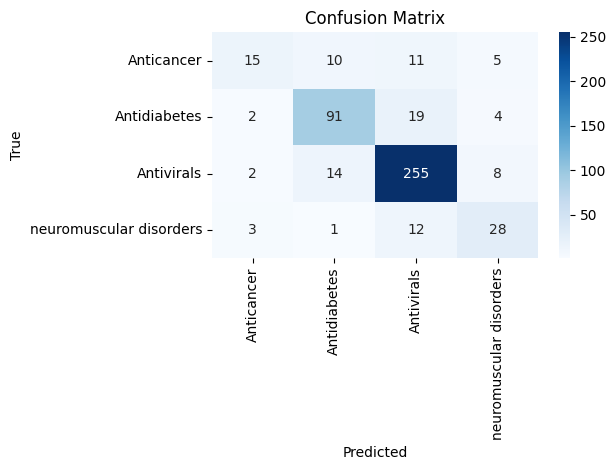

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('XGBoost_Confusion_Matrix.png',dpi=600)
plt.show()

# ROC AUC

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [32]:
n_classes = len(label_mapping)
y_test_bin = label_binarize(y_test, classes=list(label_mapping.values()))

# Get probability scores
y_score = final_model.predict_proba(X_test)

In [33]:
# Compute ROC curve and AUC for each class (OvR)
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [34]:
# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [35]:
# Compute macro-average ROC curve and AUC
# First, average FPR and TPR
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)


for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

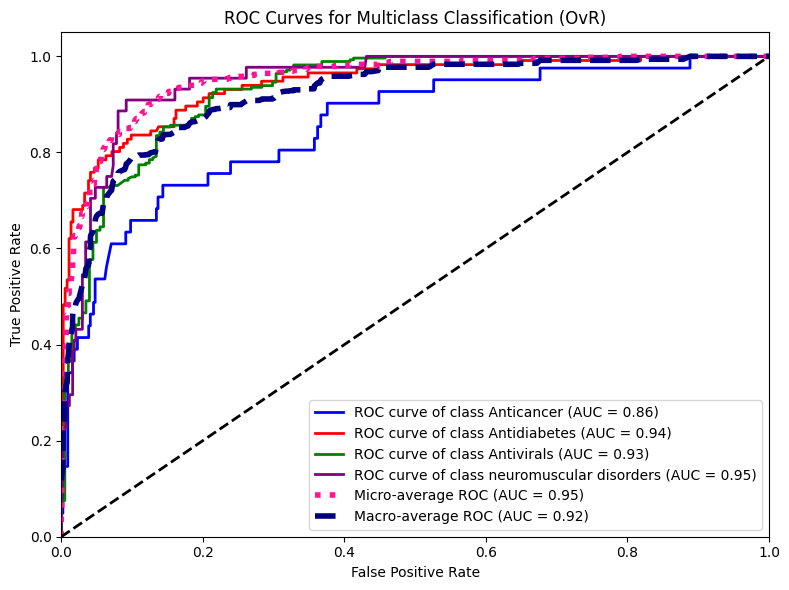

In [38]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green','purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', lw=4,
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})')

# Plot macro-average ROC
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', lw=4,
         label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.2f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification (OvR)')
plt.legend(loc="lower right")
plt.grid(False)
plt.tight_layout()
plt.savefig('XGBoost_AUC_ROC.png',dpi=600)
plt.show()